In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download("stopwords")
nltk.download("wordnet")
import re
from tqdm import tqdm

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#from genism.models import Word2vec

import spacy


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
import nltk
nltk.download('punkt_tab', quiet=True)


True

In [3]:
from gensim.models import FastText


In [6]:
df = pd.read_csv('IMDB Dataset.csv')

In [7]:
df["sentiment"].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [8]:
tqdm.pandas()


1. Lem and Stem
2. Small case
2. stop word removal

3. POS Tagging optional
4. NER = name -optional

In [9]:
lem = WordNetLemmatizer()
stem = PorterStemmer()

In [10]:
def rm_special_symbols_numbers(text):
    return re.sub(r'[^a-zA-Z\s]',"",text)

In [11]:
def pre_process(text):


    token = nltk.word_tokenize(text.lower())

    token = [lem.lemmatize(word) for word in token if word not in stopwords.words("english")]

    return " ".join(token)


In [12]:
pre = lambda text: [lem.lemmatize(word) for word in tqdm(nltk.word_tokenize(text.lower())) if word not in stopwords.words("english")]

In [13]:
df["review"] = df["review"].apply(rm_special_symbols_numbers)

In [14]:
df["review"] = df["review"].apply(pre)

Streaming output truncated to the last 5000 lines.
100%|██████████| 126/126 [00:00<00:00, 5608.07it/s]


In [15]:
#df.to_csv("cleaned_text.csv")
import pandas as pd
df = pd.read_csv("cleaned_text.csv")

In [16]:
import ast

df["review"] = df["review"].apply(lambda x: ast.literal_eval(x))


In [17]:

df["review"]= df["review"].apply(' '.join)

In [18]:
df

,Unnamed: 0,review,sentiment
0,0,one reviewer mentioned watching oz episode you...,positive
1,1,wonderful little production br br filming tech...,positive
2,2,thought wonderful way spend time hot summer we...,positive
3,3,basically there family little boy jake think t...,negative
4,4,petter matteis love time money visually stunni...,positive
...,...,...,...
49995,49995,thought movie right good job wasnt creative or...,positive
49996,49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,49997,catholic taught parochial elementary school nu...,negative
49998,49998,im going disagree previous comment side maltin...,negative


# Bag of Words (BOW)

In [19]:
vectorizer = CountVectorizer(ngram_range = (1,2))
X = vectorizer.fit_transform(df["review"])

In [20]:
y=df["sentiment"]

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [22]:
y_pred = lr.predict(X_test)

from sklearn.metrics import classification_report

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# TFIDF - Term Frequency Innverse Document Frequency

In [23]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["review"])
y=df["sentiment"]

In [24]:
X

<50000x164553 sparse matrix of type '<class 'numpy.float64'>'
	with 4876180 stored elements in Compressed Sparse Row format>

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred = lr.predict(X_test)

from sklearn.metrics import classification_report

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.90      0.89     10000



In [27]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.84      0.86      0.85      4961
    positive       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



# Feature Engineering

In [28]:
feature_importances = rf.feature_importances_

# Step 5: Get the feature names from the TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()  # List of keywords

# Step 6: Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Keyword': feature_names,
    'Importance': feature_importances
})

# Step 7: Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important keywords
print(feature_importance_df.head(60))

            Keyword  Importance
10152           bad    0.010324
161832        worst    0.008358
60189         great    0.005819
157726        waste    0.004881
100301      nothing    0.004085
9598          awful    0.003852
46503          even    0.003233
111358         poor    0.003198
94703         movie    0.003086
92109        minute    0.003036
144327     terrible    0.002973
139586       stupid    0.002902
13483          best    0.002847
16672        boring    0.002754
161780        worse    0.002729
110433         plot    0.002676
84612          love    0.002654
47066     excellent    0.002632
82685          like    0.002593
158592         well    0.002582
161215    wonderful    0.002404
39976          dont    0.002397
161895        would    0.002335
1021         acting    0.002313
84645         loved    0.002244
30595         could    0.002149
67413      horrible    0.002133
93342         money    0.002123
50974          film    0.002071
126824       script    0.002060
31242   

# Word Cloud

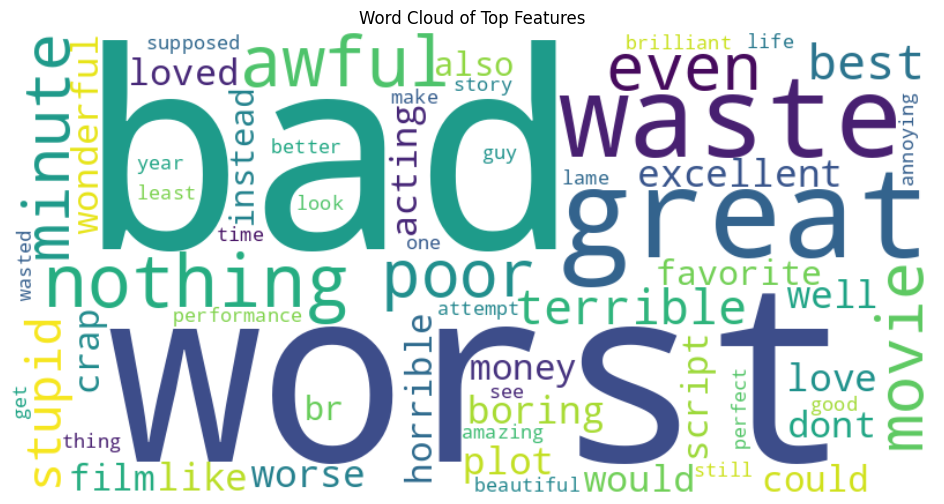

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Convert top features into a dictionary (for word cloud input)
top_keywords = feature_importance_df.head(60)  # Select top 60 keywords
word_freq = dict(zip(top_keywords['Keyword'], top_keywords['Importance']))

# Step 2: Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_freq)

# Step 3: Display the word cloud using matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axes
plt.title("Word Cloud of Top Features")
plt.show()


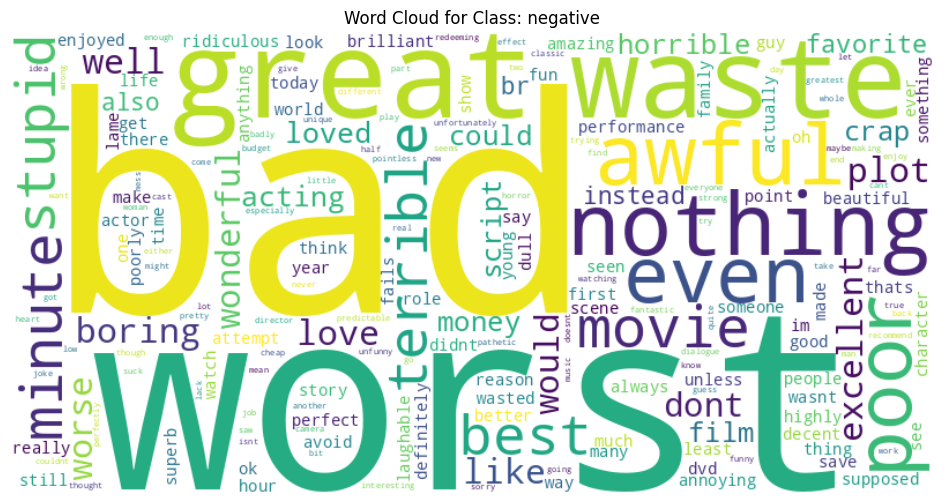

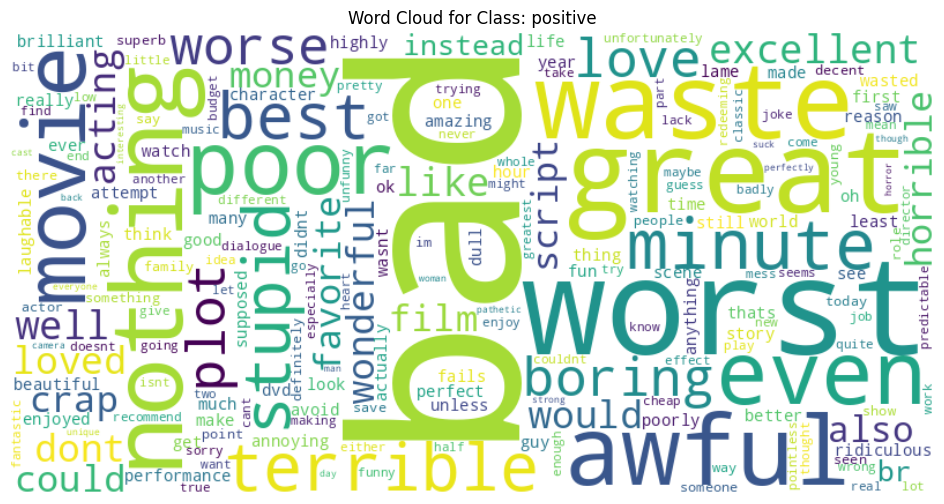

In [30]:
# Step 4: Get feature importances for each class
class_labels = rf.classes_  # Get class labels (e.g., [0, 1] for binary)
feature_names = tfidf.get_feature_names_out()  # List of keywords

for idx, class_label in enumerate(class_labels):
    # Get class-specific feature importance (via the estimator's decision function)
    class_importance = rf.feature_importances_ * rf.predict_proba(X_train)[:, idx].mean()

    # Create a DataFrame with feature names and their class-specific importance scores
    feature_importance_df = pd.DataFrame({
        'Keyword': feature_names,
        'Importance': class_importance
    }).sort_values(by='Importance', ascending=False)

    # Step 5: Generate the word cloud for the current class
    word_freq = dict(zip(feature_importance_df['Keyword'], feature_importance_df['Importance']))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

    # Step 6: Display the word cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Class: {class_label}")
    plt.show()


# Word Vectors Convert using FastText


In [31]:
from gensim.models import FastText
import numpy as np

# Tokenize reviews (split each review into a list of words)
tokenized_reviews = [review.split() for review in df["review"]]

# Train FastText model on tokenized reviews
fm = FastText(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Function to generate a vector for a sentence
def get_vector(tokens, model):
    vec = np.zeros(model.vector_size)  # Initialize zero vector of appropriate size
    count = 0  # Track the number of valid word vectors
    for word in tokens:
        if word in model.wv:  # Check if the word exists in the vocabulary
            vec += model.wv[word]
            count += 1
    if count != 0:
        vec /= count  # Take the average if valid words are found
    return vec

# Generate feature matrix for all reviews
X = np.array([get_vector(tokens, fm) for tokens in tokenized_reviews])

# Assuming 'sentiment' column is the target variable
y = df["sentiment"]

# Print the shape of the generated feature matrix
print(f"Feature Matrix Shape: {X.shape}")

# Now, you can proceed to split the data, train a model, and evaluate it
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict on the test data
y_pred = lr.predict(X_test)

# Display the classification report
print(classification_report(y_test, y_pred))


Feature Matrix Shape: (50000, 100)
              precision    recall  f1-score   support

    negative       0.85      0.83      0.84      4961
    positive       0.84      0.85      0.85      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



# Word Vectors Pre trained



In [32]:
pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313474 sha256=ed9f803cced0ec45d906be50e843a5e866df9dea10e6c1d49cdc04975696ff37
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [34]:
import fasttext.util
import numpy as np


# Load pre-trained FastText English word vectors
fasttext.util.download_model('en', if_exists='ignore')  # Downloads 'cc.en.300.bin'
ft = fasttext.load_model('cc.en.300.bin')



In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
#df_p = df[df["sentiment"]=="positive"].iloc[0:100]
#df_n = df[df["sentiment"]=="negative"].iloc[0:100]
#df = pd.concat([df_p,df_n])

In [44]:
df = df[0:10000]

In [45]:
#pip install fasttext-wheel
# Helper function to generate sentence embeddings using FastText
def sentence_embedding(sentence):
    words = sentence.split()
    embeddings = [ft.get_word_vector(word) for word in words if word in ft]
    if embeddings:
        return np.mean(embeddings, axis=0)  # Average word vectors to get sentence vector
    else:
        return np.zeros(300)  # Return zero vector if no valid words found



In [46]:
# Generate embeddings for all reviews
X = np.array([sentence_embedding(text) for text in df["review"]])
y = df["sentiment"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Generate and display the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.81      0.79      0.80       996
    positive       0.79      0.81      0.80      1004

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



# Word2vec with n grams

In [47]:
from nltk.util import ngrams

In [48]:
#pip install fasttext-wheel
# Helper function to generate sentence embeddings using FastText
def sentence_embedding(sentence,ft,n):
    words = sentence.split()
    vec = np.zeros(ft.get_dimension())
    sg = ngrams(words, n)

    for i in sg:
        gram_str = ' '.join(i)
        vec += ft.get_word_vector(gram_str)
    return vec

In [49]:
# Generate embeddings for all reviews
X = np.array([sentence_embedding(text,ft,7) for text in df["review"]])
y = df["sentiment"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Generate and display the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.74      0.73      0.73       996
    positive       0.74      0.75      0.74      1004

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000

